In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
std_scale = StandardScaler()

In [26]:
StandardScaler()

StandardScaler()

In [154]:
data = pd.read_csv (r"C:\Users\nitis\Downloads\insurance_part2_data.csv")

In [155]:
data.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [156]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [157]:
data.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [178]:
for feature in data.columns: 
    if data[feature].dtype == 'object': 
        data[feature] = pd.Categorical(data[feature]).codes

In [179]:
data.shape

(3000, 10)

In [180]:
data.dtypes.value_counts()

int8       6
int64      2
float64    2
dtype: int64

In [181]:
data.describe()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,38.091000,1.306333,0.612333,0.308000,14.529203,0.984667,70.001333,60.249913,1.661667,0.250000
std,10.463518,0.994060,0.487299,0.461744,25.481455,0.122895,134.053313,70.733954,1.258726,0.575277
min,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000
25%,32.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,20.000000,1.000000,0.000000
50%,36.000000,2.000000,1.000000,0.000000,4.630000,1.000000,26.500000,33.000000,2.000000,0.000000
75%,42.000000,2.000000,1.000000,1.000000,17.235000,1.000000,63.000000,69.000000,2.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,210.210000,1.000000,4580.000000,539.000000,4.000000,2.000000


In [182]:
dupes = data.duplicated()
print('Number of duplicate rows = %d' % (dupes.sum()))
data[dupes]

Number of duplicate rows = 139


,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,0,0,1,15.0,1,27,60.0,0,0
329,36,2,1,0,0.0,1,5,20.0,2,0
407,36,2,1,0,0.0,1,11,19.0,1,0
411,35,2,1,0,0.0,1,2,20.0,2,0
422,36,2,1,0,0.0,1,5,20.0,2,0
...,...,...,...,...,...,...,...,...,...,...
2940,36,2,1,0,0.0,1,8,10.0,1,0
2947,36,2,1,0,0.0,1,10,28.0,2,0
2952,36,2,1,0,0.0,1,2,10.0,1,0
2962,36,2,1,0,0.0,1,4,20.0,2,0


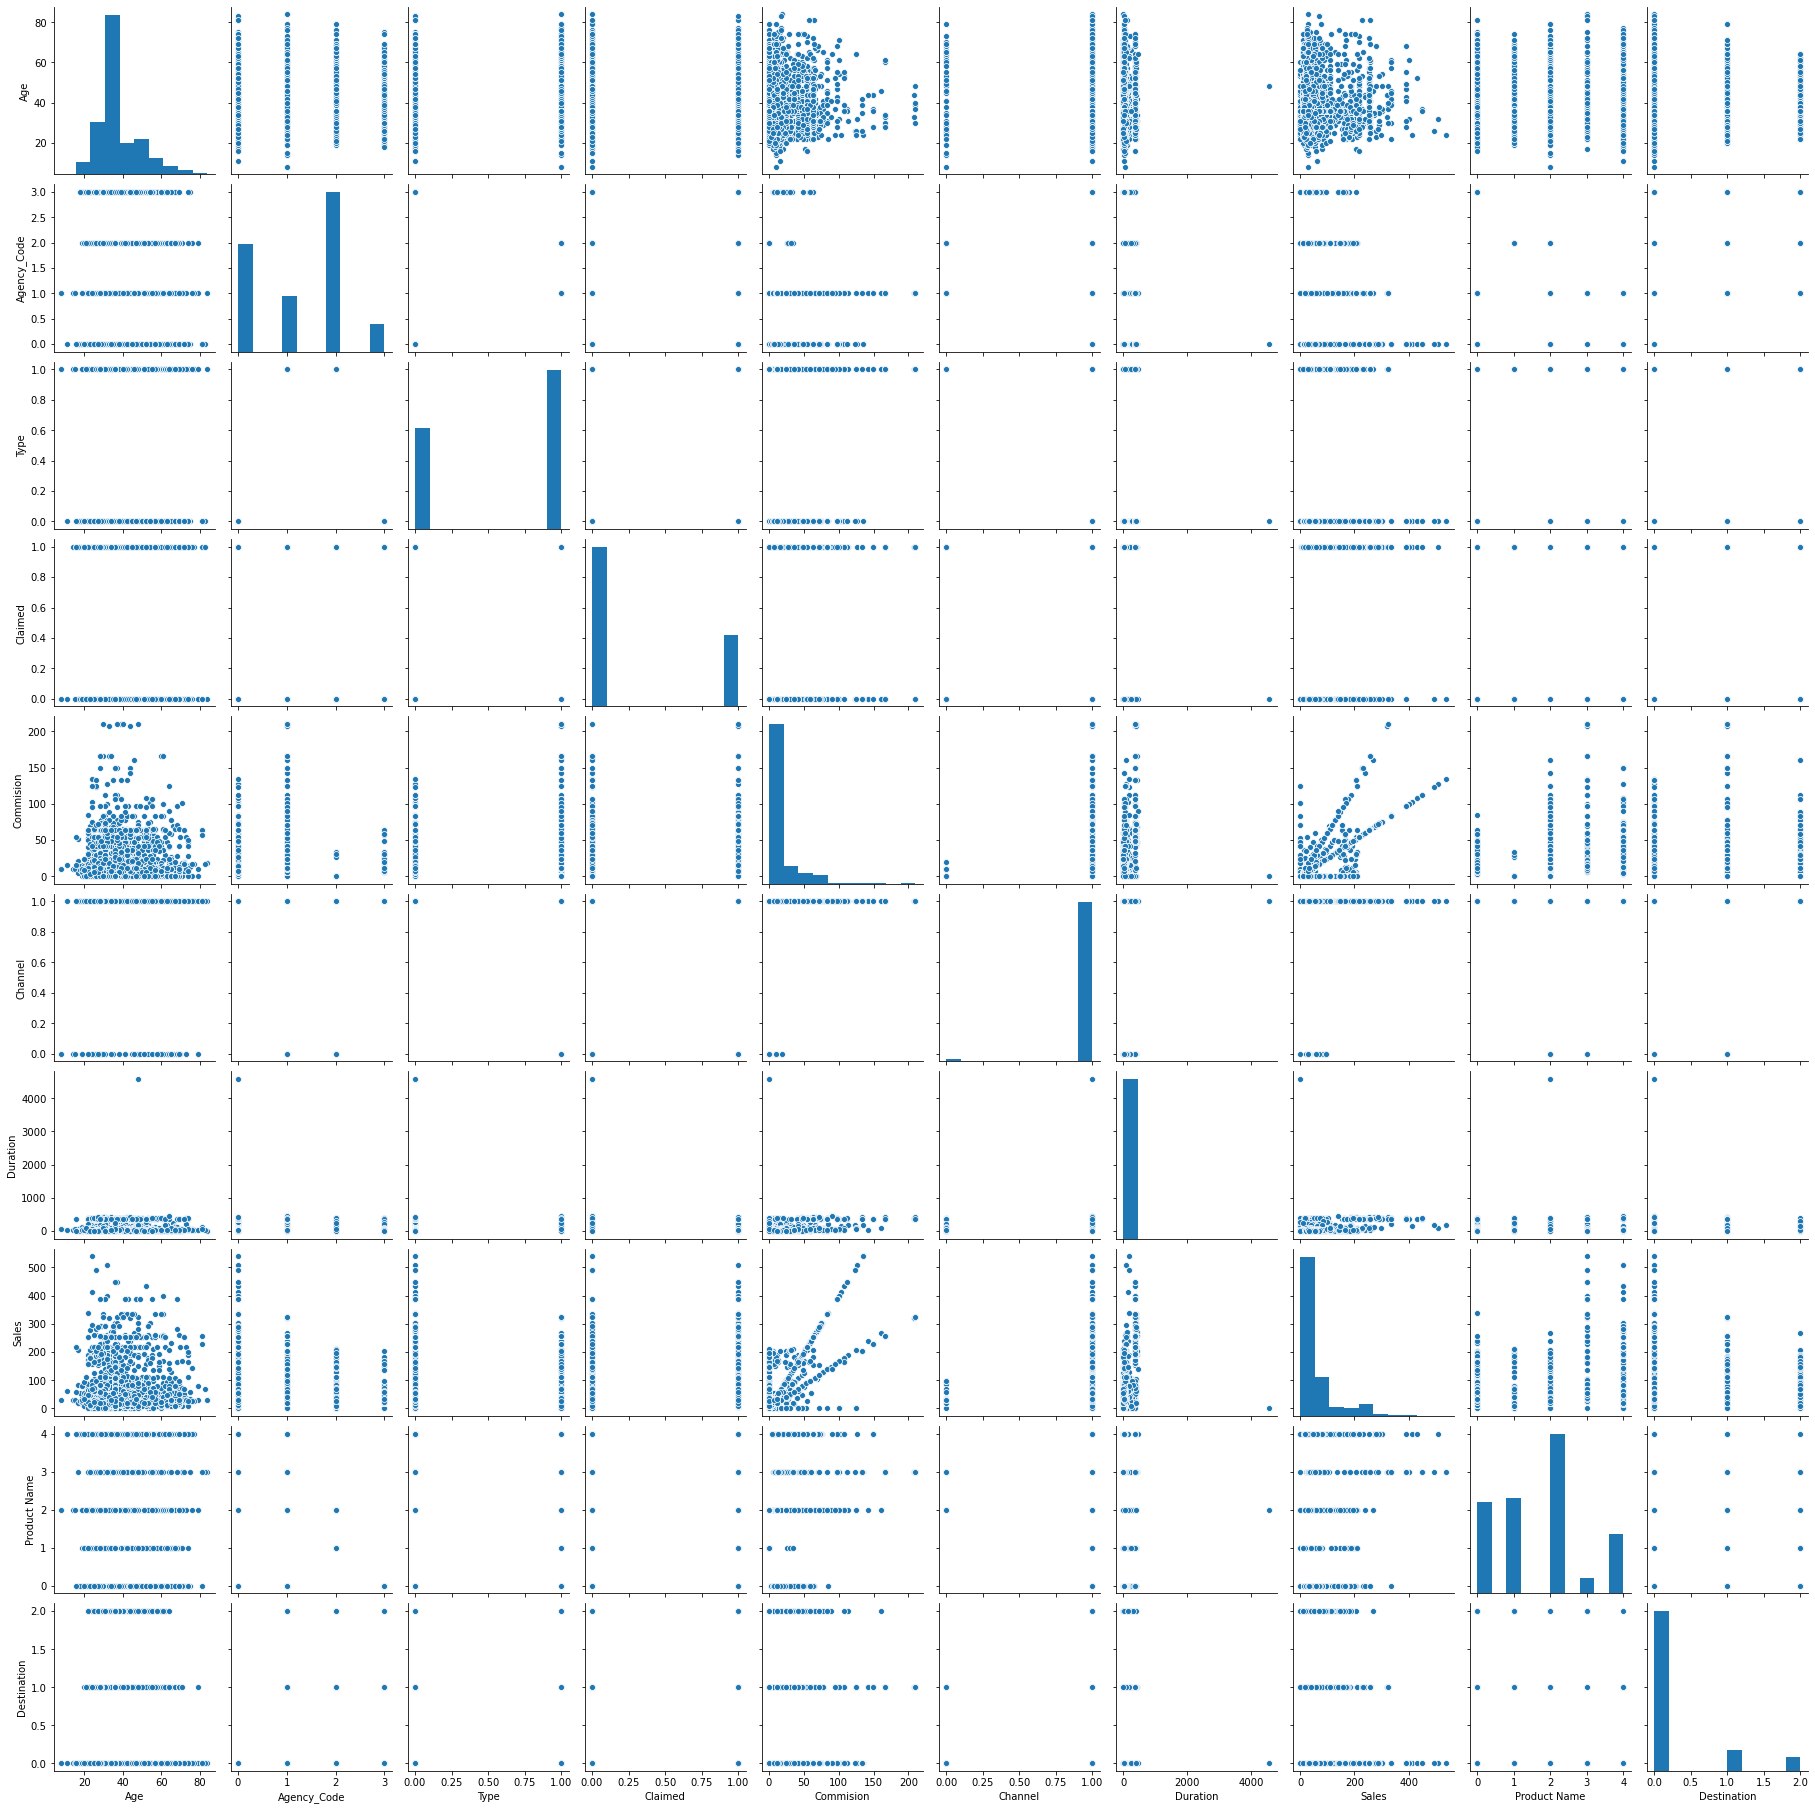

In [183]:
sns.pairplot(data)

In [193]:
data = data.drop('Agency_Code', axis=1)

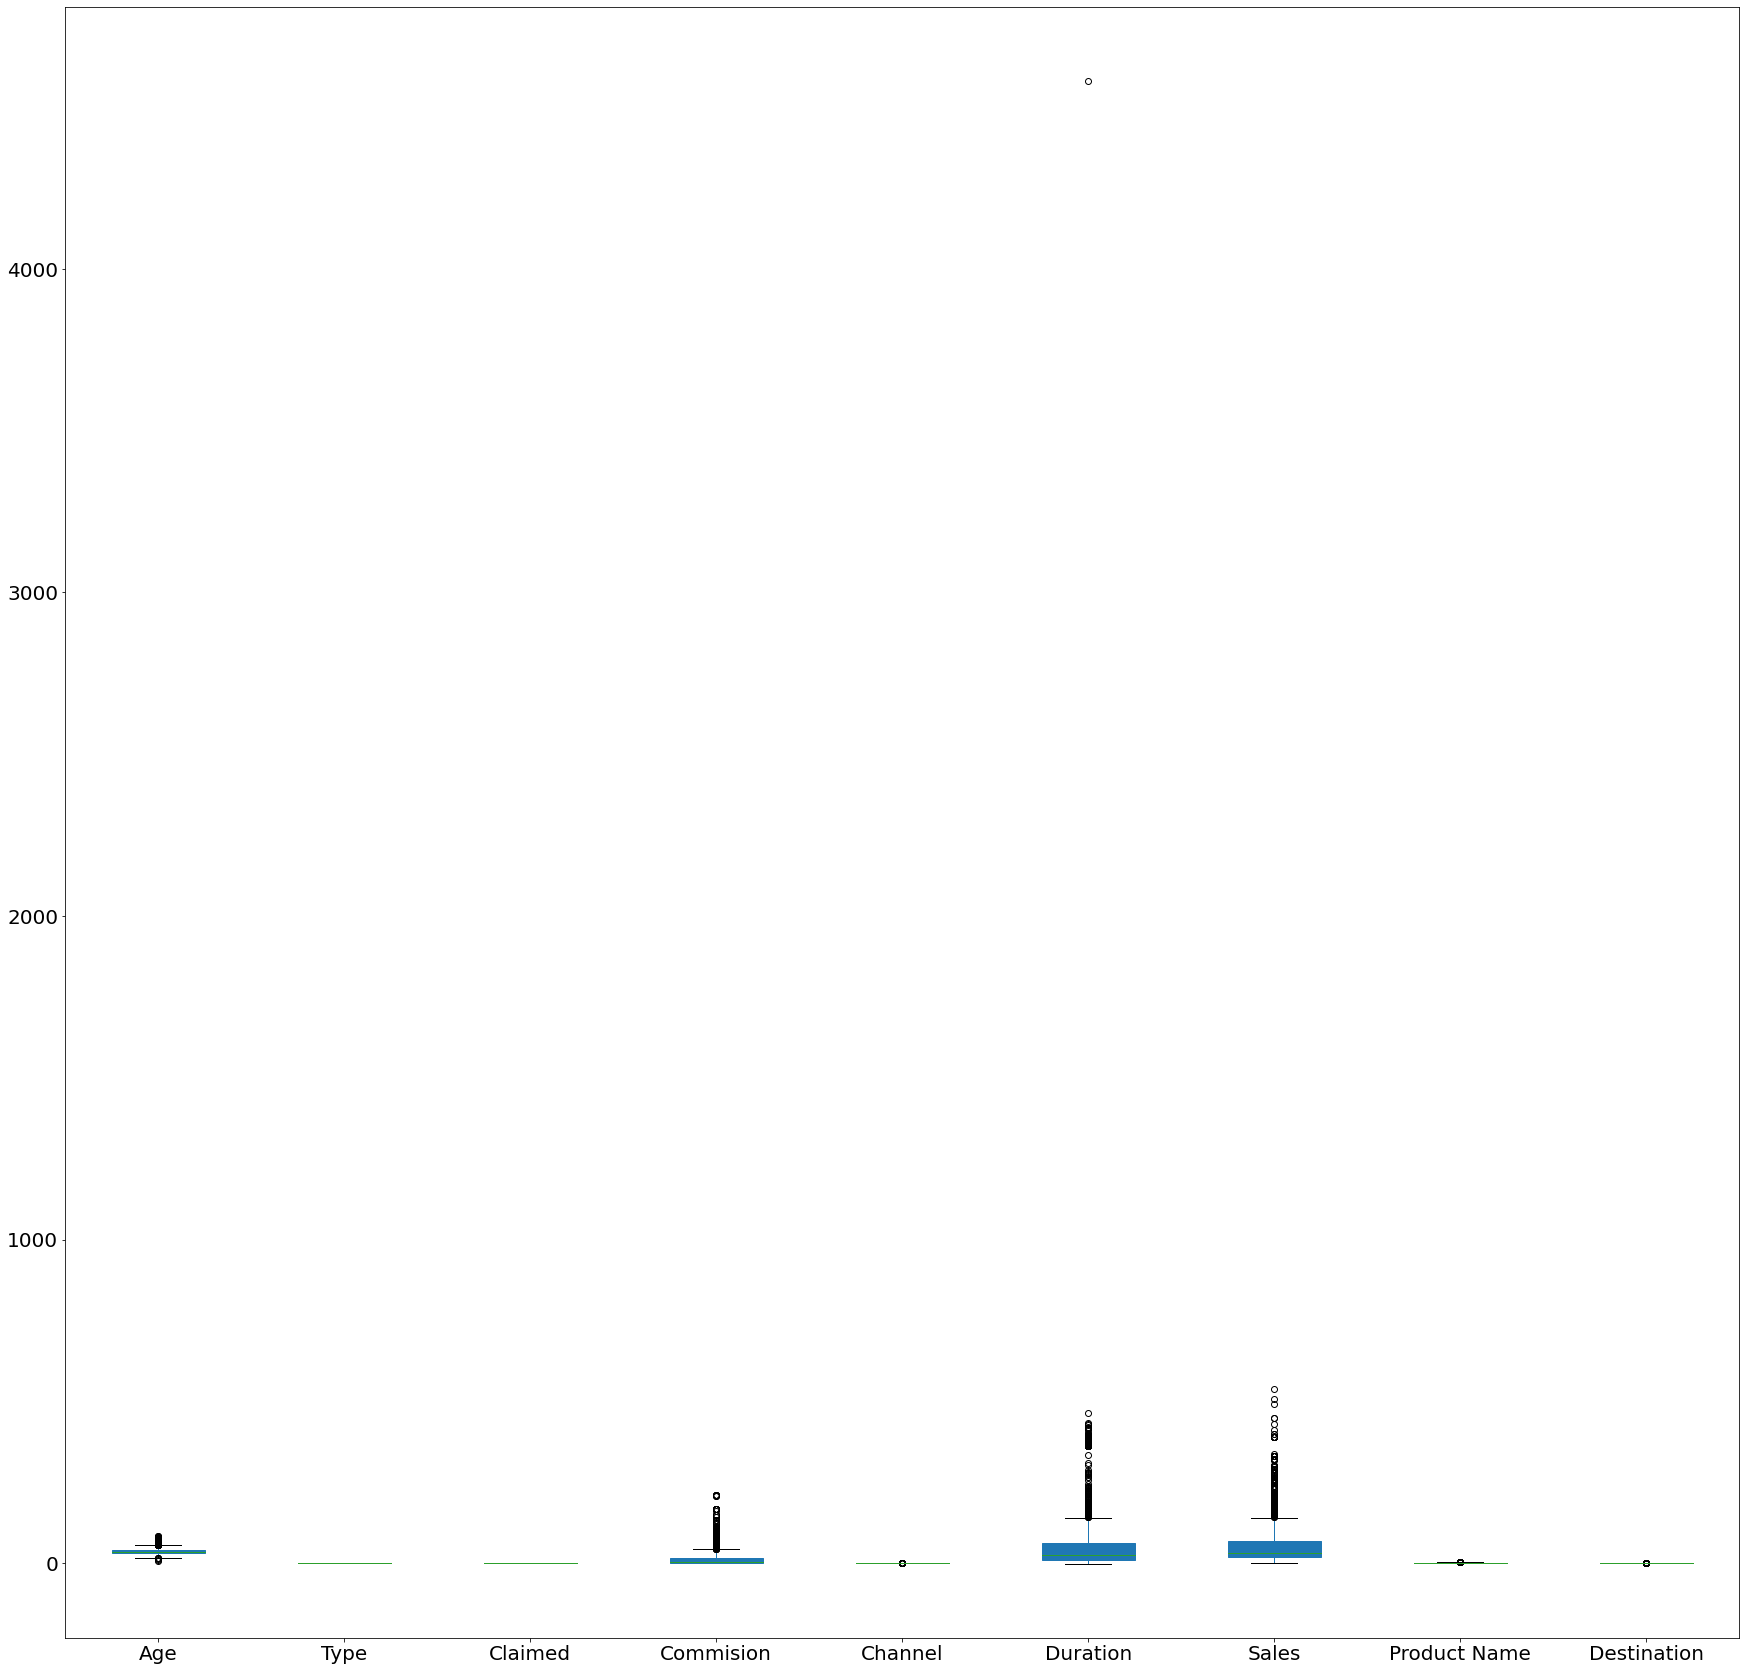

In [194]:
data.plot(kind='box', figsize = (30,30
                                
                            ), fontsize=20, patch_artist=True)

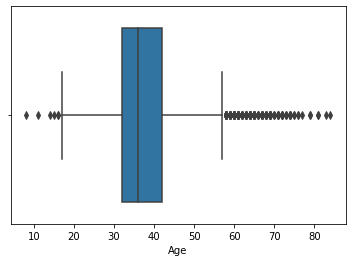

In [186]:
sns.boxplot(x='Age', data=data)

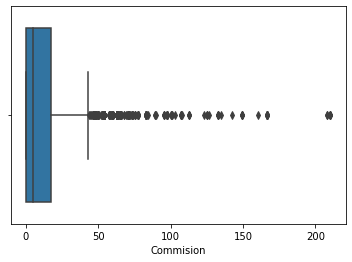

In [187]:
sns.boxplot(x='Commision', data=data)

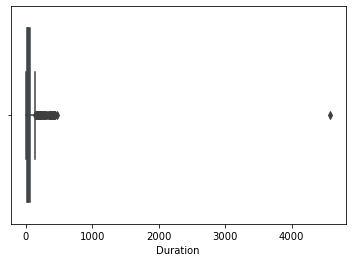

In [188]:
sns.boxplot(x='Duration', data=data)

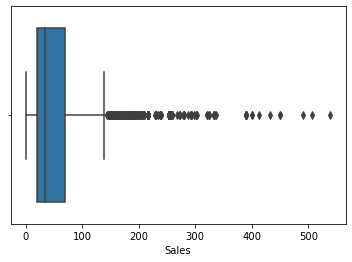

In [189]:
sns.boxplot(x='Sales', data=data)

In [195]:
data.corr()

,Age,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
Age,1.000000,-0.048992,-0.030027,0.067717,-0.068927,0.030425,0.039455,0.020643,0.004750
Type,-0.048992,1.000000,-0.343505,-0.216599,-0.099291,-0.198219,-0.254868,-0.008416,0.317289
Claimed,-0.030027,-0.343505,1.000000,0.297498,-0.016641,0.214923,0.348877,0.257951,-0.023851
Commision,0.067717,-0.216599,0.297498,1.000000,0.033563,0.471389,0.766505,0.399306,0.184017
Channel,-0.068927,-0.099291,-0.016641,0.033563,1.000000,-0.019389,0.037418,-0.037859,0.035373
Duration,0.030425,-0.198219,0.214923,0.471389,-0.019389,1.000000,0.558930,0.354763,-0.019665
Sales,0.039455,-0.254868,0.348877,0.766505,0.037418,0.558930,1.000000,0.474634,0.094267
Product Name,0.020643,-0.008416,0.257951,0.399306,-0.037859,0.354763,0.474634,1.000000,0.021528
Destination,0.004750,0.317289,-0.023851,0.184017,0.035373,-0.019665,0.094267,0.021528,1.000000


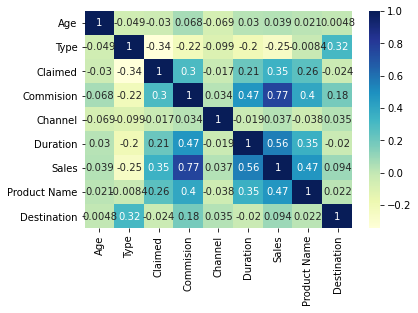

In [196]:
sns.heatmap(data.corr(), cmap='YlGnBu', annot=True)

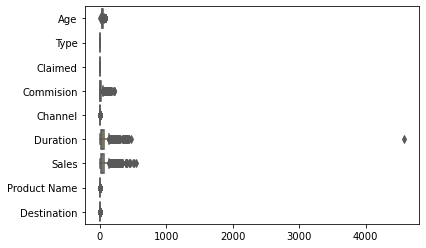

In [197]:
sns.boxplot(data=data, orient="h", palette="Set2")

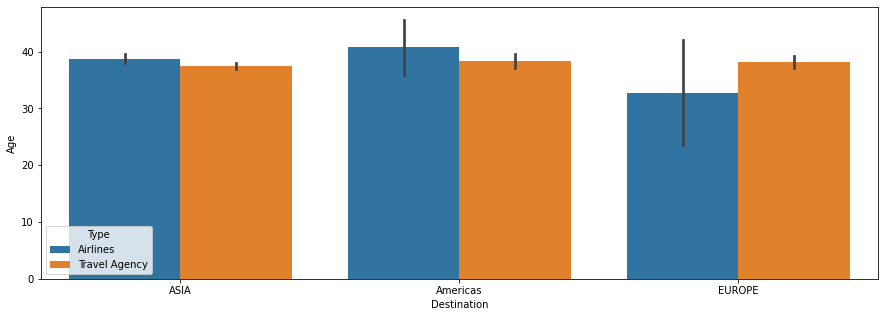

In [173]:
plt.figure(figsize=(15,5))
sns.barplot(data=data,x='Destination',y='Age',hue='Type')
plt.show()

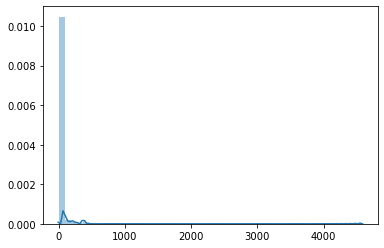

In [198]:
sns.distplot(data)

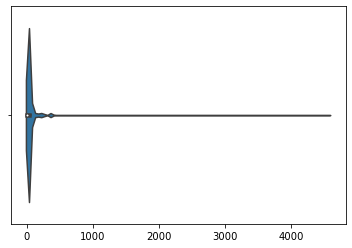

In [200]:
sns.violinplot(data)

In [202]:
X = data.drop("Claimed" , axis=1)

y = data.pop("Claimed")

In [301]:
sc = StandardScaler()

In [302]:
X_train = sc.fit_transform(X_train)

In [304]:
X_test = sc.transform(X_test)

In [305]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

In [306]:
from sklearn.tree import DecisionTreeClassifier

In [307]:
dt_model = DecisionTreeClassifier(criterion = 'gini' )

In [308]:
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier()

In [309]:
from sklearn import tree

In [310]:
train_char_label = ['No', 'Yes']
Credit_Tree_File = open('e:\credit_tree.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

Credit_Tree_File.close()

In [311]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                   Imp
Age           0.194121
Type          0.000383
Commision     0.149082
Channel       0.008256
Duration      0.260676
Sales         0.183743
Product Name  0.179297
Destination   0.024441


In [312]:
y_predict = dt_model.predict(X_test)

In [313]:
credit_tree_regularized = open('e:\credit_tree_regularized.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file= credit_tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

credit_tree_regularized.close()

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                   Imp
Age           0.194121
Type          0.000383
Commision     0.149082
Channel       0.008256
Duration      0.260676
Sales         0.183743
Product Name  0.179297
Destination   0.024441


In [314]:
reg_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 7,min_samples_leaf=10,min_samples_split=30)
reg_dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=10, min_samples_split=30)

In [315]:
ytrain_predict = reg_dt_model.predict(X_train)
ytest_predict = reg_dt_model.predict(X_test)

AUC: 0.864


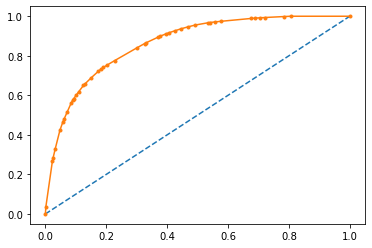

In [316]:
# AUC and ROC for the training data

# predict probabilities
probs = reg_dt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.795


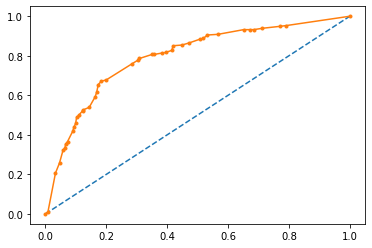

In [317]:
# AUC and ROC for the test data


# predict probabilities
probs = reg_dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [318]:
from sklearn.metrics import classification_report,confusion_matrix

In [319]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1471
           1       0.73      0.57      0.64       629

    accuracy                           0.81      2100
   macro avg       0.78      0.74      0.76      2100
weighted avg       0.80      0.81      0.80      2100



In [320]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.77      0.91      0.83       605
           1       0.70      0.44      0.54       295

    accuracy                           0.75       900
   macro avg       0.73      0.67      0.69       900
weighted avg       0.74      0.75      0.74       900



In [321]:
confusion_matrix(train_labels, ytrain_predict)

array([[1340,  131],
       [ 268,  361]], dtype=int64)

In [322]:
confusion_matrix(test_labels, ytest_predict)

array([[548,  57],
       [165, 130]], dtype=int64)

In [323]:
reg_dt_model.score(X_train,train_labels)

0.81

In [324]:
reg_dt_model.score(X_test,test_labels)

0.7533333333333333

RANDOM FOREST

In [325]:
from sklearn.ensemble import RandomForestClassifier

In [326]:
X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

In [404]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [7, 10],
    'max_features': [4, 6],
    'min_samples_leaf': [50, 100],
    'min_samples_split': [150, 300],
    'n_estimators': [301, 501]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [405]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [7, 10], 'max_features': [4, 6],
                         'min_samples_leaf': [50, 100],
                         'min_samples_split': [150, 300],
                         'n_estimators': [301, 501]})

In [406]:
grid_search.best_params_

{'max_depth': 7,
 'max_features': 4,
 'min_samples_leaf': 50,
 'min_samples_split': 150,
 'n_estimators': 301}

In [407]:
rfcl = RandomForestClassifier(n_estimators = 501, oob_score=True)
rfcl = rfcl.fit(X_train, train_labels)

In [408]:
rfcl.oob_score_

0.7504761904761905

In [409]:
ytrain_predict = rfcl.predict(X_train)
ytest_predict = rfcl.predict(X_test)

In [410]:
confusion_matrix(train_labels,ytrain_predict)

array([[1468,    3],
       [   8,  621]], dtype=int64)

In [411]:
confusion_matrix(test_labels,ytest_predict)

array([[536,  69],
       [164, 131]], dtype=int64)

In [412]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1471
           1       1.00      0.99      0.99       629

    accuracy                           0.99      2100
   macro avg       0.99      0.99      0.99      2100
weighted avg       0.99      0.99      0.99      2100



In [413]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.77      0.89      0.82       605
           1       0.66      0.44      0.53       295

    accuracy                           0.74       900
   macro avg       0.71      0.67      0.68       900
weighted avg       0.73      0.74      0.73       900



AUC: 1.000


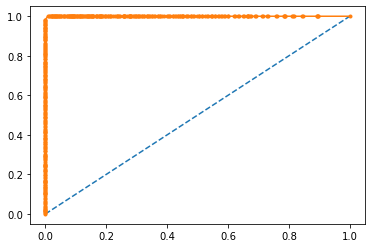

In [414]:
# AUC and ROC for the training data

# predict probabilities
probs = rfcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.798


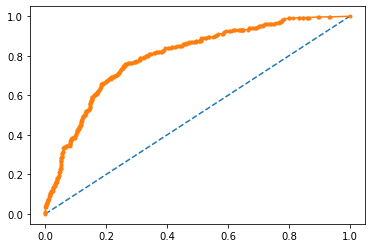

In [415]:
# AUC and ROC for the test data


# predict probabilities
probs = rfcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

ANN

In [379]:
from sklearn.neural_network import MLPClassifier

In [389]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size= 0.30, random_state=1)


In [390]:
clf = MLPClassifier(hidden_layer_sizes=100, max_iter=5000,
                     solver='sgd', verbose=True,  random_state=1,tol=0.01)

In [394]:
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)

Iteration 1, loss = 2.34020442
Iteration 2, loss = 1.26309990
Iteration 3, loss = 0.76573446
Iteration 4, loss = 0.86982308
Iteration 5, loss = 0.80585993
Iteration 6, loss = 0.78551460
Iteration 7, loss = 0.62106334
Iteration 8, loss = 0.62869126
Iteration 9, loss = 0.68629421
Iteration 10, loss = 0.68706051
Iteration 11, loss = 0.59922229
Iteration 12, loss = 0.64269489
Iteration 13, loss = 0.54098158
Iteration 14, loss = 0.57297637
Iteration 15, loss = 0.61146156
Iteration 16, loss = 0.61090881
Iteration 17, loss = 0.53507189
Iteration 18, loss = 0.63167056
Iteration 19, loss = 0.53640531
Iteration 20, loss = 0.53052257
Iteration 21, loss = 0.54567353
Iteration 22, loss = 0.52702010
Iteration 23, loss = 0.53583301
Iteration 24, loss = 0.54039288
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.


In [395]:
cm = confusion_matrix(Y_test, y_pred)
cm

array([[462, 143],
       [123, 172]], dtype=int64)

In [397]:
pred2 = clf.predict(X_train)
confusion_matrix(Y_train,pred2)

array([[1094,  377],
       [ 227,  402]], dtype=int64)

In [398]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.76      0.78       605
           1       0.55      0.58      0.56       295

    accuracy                           0.70       900
   macro avg       0.67      0.67      0.67       900
weighted avg       0.71      0.70      0.71       900



In [399]:
print(classification_report(Y_train, pred2))

              precision    recall  f1-score   support

           0       0.83      0.74      0.78      1471
           1       0.52      0.64      0.57       629

    accuracy                           0.71      2100
   macro avg       0.67      0.69      0.68      2100
weighted avg       0.73      0.71      0.72      2100



AUC: 0.773


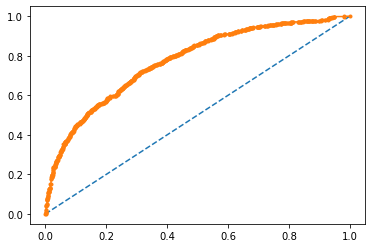

In [402]:
# AUC and ROC for the training data

# predict probabilities
probs = clf.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.730


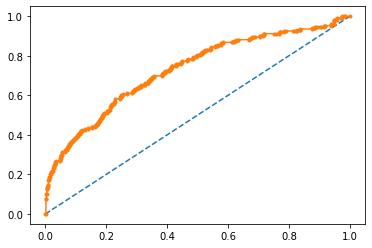

In [403]:

# AUC and ROC for the test data

# predict probabilities
probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()